In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [4]:
from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import savez_compressed

In [5]:
# load all test sketches in the sketch_directory into memory
def load_test_sketches(path, size=(256,256)):
    skt_list = list()
    # enumerate filenames in test-sketch directory
    for filename in sorted(listdir(path)):
        # load and resize the image
        skt_pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        skt_pixels = img_to_array(skt_pixels)
        skt_list.append(skt_pixels)
    return asarray(skt_list)
    

In [6]:
# load all real test images in the test_real_images directory into memory
def load_test_realimg(path, size=(256,256)):
    real_list = list()
    # enumerate filenames in real test image directory
    for filename in sorted(listdir(path)):
        # load and resize the image
        real_pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        real_pixels = img_to_array(real_pixels)
        real_list.append(real_pixels)
    return asarray(real_list)
    

In [10]:
test_path_skt = "/home/nirisha/Desktop/majors/majors/asians/asians_sketch/asians_test_sketch/"
test_path_real = "/home/nirisha/Desktop/majors/majors/asians/asians_real/asians_test_real/"

In [11]:
load_test_sketches(test_path_skt)

array([[[[180., 180., 180.],
         [251., 251., 251.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [177., 177., 177.]],

        [[160., 160., 160.],
         [248., 248., 248.],
         [251., 251., 251.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [172., 172., 172.]],

        [[164., 164., 164.],
         [251., 251., 251.],
         [251., 251., 251.],
         ...,
         [253., 253., 253.],
         [255., 255., 255.],
         [171., 171., 171.]],

        ...,

        [[130., 130., 130.],
         [247., 247., 247.],
         [244., 244., 244.],
         ...,
         [254., 254., 254.],
         [252., 252., 252.],
         [168., 168., 168.]],

        [[129., 129., 129.],
         [250., 250., 250.],
         [246., 246., 246.],
         ...,
         [255., 255., 255.],
         [254., 254., 254.],
         [172., 172., 172.]],

        [[137., 137., 137.],
       

In [12]:
load_test_realimg(test_path_real)

array([[[[116., 193., 221.],
         [119., 194., 223.],
         [117., 192., 223.],
         ...,
         [109., 186., 212.],
         [108., 185., 211.],
         [104., 186., 208.]],

        [[119., 196., 226.],
         [117., 192., 221.],
         [117., 194., 222.],
         ...,
         [105., 185., 210.],
         [106., 186., 211.],
         [108., 185., 213.]],

        [[118., 193., 224.],
         [122., 195., 227.],
         [121., 195., 224.],
         ...,
         [107., 189., 213.],
         [107., 187., 210.],
         [108., 186., 209.]],

        ...,

        [[103., 183., 208.],
         [105., 182., 210.],
         [107., 182., 211.],
         ...,
         [104., 184., 211.],
         [102., 182., 209.],
         [ 99., 183., 209.]],

        [[ 97., 181., 209.],
         [105., 180., 212.],
         [104., 181., 211.],
         ...,
         [105., 182., 208.],
         [105., 182., 208.],
         [102., 179., 205.]],

        [[ 98., 179., 206.],
       

In [13]:
test_skt_images = load_test_sketches(test_path_skt)
test_real_images =  load_test_realimg(test_path_real)
print(test_skt_images.shape,test_real_images.shape)

(36, 256, 256, 3) (36, 256, 256, 3)


In [14]:
filename = 'asianstest_256.npz'

In [15]:
savez_compressed(filename, test_skt_images, test_real_images)

In [16]:
print('Saved dataset: ', filename)

Saved dataset:  asianstest_256.npz


Loaded:  (36, 256, 256, 3) (36, 256, 256, 3)


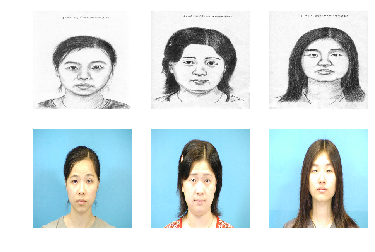

In [17]:
from numpy import load

# load the dataset

data = load('asianstest_256.npz')
skt_images, real_images = data['arr_0'], data['arr_1']
print('Loaded: ', test_skt_images.shape, test_real_images.shape)

# plot source images
n_samples = 3
# plt.imshow(skt_images[0].astype('uint8'))

for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(test_skt_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + n_samples + i)
    plt.axis('off')
    plt.imshow(test_real_images[i].astype('uint8'))
plt.show()